In [1]:
import pandas as pd
pd.set_option("display.max_columns",999) # display all columns

from pymatgen.analysis.local_env import BrunnerNN_reciprocal, BrunnerNN_relative, BrunnerNN_real, EconNN, JMolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, VoronoiNN_modified, CrystalNN
from materialscoord.core import Benchmark, HumanInterpreter

methods = [BrunnerNN_reciprocal(), HumanInterpreter()]

structure_groups = ["common_binaries"] 

unique_sites = 4

algo = ["BrunnerNN_reciprocal"]

/Users/hillarypan/AJResearch/cn_routines/codes/pymatgen/pymatgen/__init__.py:87: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


ImportError: No module named materialscoord.core

In [2]:
uw_bm = Benchmark(methods=methods, structure_groups=structure_groups, unique_sites=True,
                  use_weights=False, cations=True)
uw_bm.benchmark()

Initialization successful.


In [3]:
uw = uw_bm.report(totals=False, separate_columns=True, max_sites=unique_sites)
uw

,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,HumanInterpreter0,HumanInterpreter1,HumanInterpreter2,HumanInterpreter3
Al2O3_corundum_9770,{'O2-': 6},{},{},{},"{'Al': 0.0, 'O': 6.0}",{},{},{}
CaF2_fluorite,{'F': 8},{},{},{},{'F': 8.0},{},{},{}
CsCl,{'Cl': 8},{},{},{},{'Cl': 8.0},{},{},{}
Fe3O4_spinel,{'O': 6},{'O': 4},{},{},{'O': 6.0},{'O': 4.0},{},{}
NaCl_rocksalt,{'Cl': 6},{},{},{},{'Cl': 6.0},{},{},{}
TiO2_anatase,{'O': 6},{},{},{},{'O': 6.0},{},{},{}
ZnS_wurtzite,{'S': 4},{},{},{},{'S': 4.0},{},{},{}
ZnS_zincblende,{'S': 4},{},{},{},{'S': 4.0},{},{},{}


In [4]:
from materialscoord.nb_funcs import nb_funcs # used to calculate algo accuracy scores
nbf_uw = nb_funcs(uw, algo, unique_sites=unique_sites, cations=True)

In [5]:
# take out MinimumVIRENN oxidation states e.g. 'O2-' and 'F-'
mv_uw = nbf_uw.mv_df()
mv_uw

,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,HumanInterpreter0,HumanInterpreter1,HumanInterpreter2,HumanInterpreter3
Al2O3_corundum_9770,{'O2-': 6},{},{},{},"{'Al': 0.0, 'O': 6.0}",{},{},{}
CaF2_fluorite,{'F': 8},{},{},{},{'F': 8.0},{},{},{}
CsCl,{'Cl': 8},{},{},{},{'Cl': 8.0},{},{},{}
Fe3O4_spinel,{'O': 6},{'O': 4},{},{},{'O': 6.0},{'O': 4.0},{},{}
NaCl_rocksalt,{'Cl': 6},{},{},{},{'Cl': 6.0},{},{},{}
TiO2_anatase,{'O': 6},{},{},{},{'O': 6.0},{},{},{}
ZnS_wurtzite,{'S': 4},{},{},{},{'S': 4.0},{},{},{}
ZnS_zincblende,{'S': 4},{},{},{},{'S': 4.0},{},{},{}


In [6]:
# subtract human interpreted value from algo-calculated value
sub_uw = nbf_uw.sub_hi()
sub_uw

,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3
Al2O3_corundum_9770,"{'O2-': 6, 'Al': 0.0, 'O': -6.0}",{},{},{}
CaF2_fluorite,{'F': 0.0},{},{},{}
CsCl,{'Cl': 0.0},{},{},{}
Fe3O4_spinel,{'O': 0.0},{'O': 0.0},{},{}
NaCl_rocksalt,{'Cl': 0.0},{},{},{}
TiO2_anatase,{'O': 0.0},{},{},{}
ZnS_wurtzite,{'S': 0.0},{},{},{}
ZnS_zincblende,{'S': 0.0},{},{},{}


In [7]:
# take abs value of difference
abs_uw = nbf_uw.abs_df()
abs_uw

,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3
Al2O3_corundum_9770,"{'O2-': 6, 'Al': 0.0, 'O': 6.0}",{},{},{}
CaF2_fluorite,{'F': 0.0},{},{},{}
CsCl,{'Cl': 0.0},{},{},{}
Fe3O4_spinel,{'O': 0.0},{'O': 0.0},{},{}
NaCl_rocksalt,{'Cl': 0.0},{},{},{}
TiO2_anatase,{'O': 0.0},{},{},{}
ZnS_wurtzite,{'S': 0.0},{},{},{}
ZnS_zincblende,{'S': 0.0},{},{},{}


In [8]:
# adds two new columns
# df['num equiv site atoms'] (list): of how many equivalent sites there are for particular unique site
# df['num unit cell atoms'] (int): number of cations in unit cell
cs_uw = nbf_uw.cif_stats()
cs_uw

,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,num equiv site atoms,num cations
Al2O3_corundum_9770,"{'O2-': 6, 'Al': 0.0, 'O': 6.0}",{},{},{},"[12, 18, 0, 0]",18
CaF2_fluorite,{'F': 0.0},{},{},{},"[1, 2, 0, 0]",2
CsCl,{'Cl': 0.0},{},{},{},"[1, 1, 0, 0]",1
Fe3O4_spinel,{'O': 0.0},{'O': 0.0},{},{},"[4, 2, 8, 0]",8
NaCl_rocksalt,{'Cl': 0.0},{},{},{},"[1, 1, 0, 0]",1
TiO2_anatase,{'O': 0.0},{},{},{},"[2, 4, 0, 0]",4
ZnS_wurtzite,{'S': 0.0},{},{},{},"[2, 2, 0, 0]",2
ZnS_zincblende,{'S': 0.0},{},{},{},"[1, 1, 0, 0]",1


In [9]:
me_df = nbf_uw.mult_equiv()
me_df

,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,num equiv site atoms,num cations
Al2O3_corundum_9770,"{'O2-': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], ...",{},{},{},"[12, 18, 0, 0]",18
CaF2_fluorite,{'F': [0.0]},{},{},{},"[1, 2, 0, 0]",2
CsCl,{'Cl': [0.0]},{},{},{},"[1, 1, 0, 0]",1
Fe3O4_spinel,"{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0]}",{},{},"[4, 2, 8, 0]",8
NaCl_rocksalt,{'Cl': [0.0]},{},{},{},"[1, 1, 0, 0]",1
TiO2_anatase,"{'O': [0.0, 0.0]}",{},{},{},"[2, 4, 0, 0]",4
ZnS_wurtzite,"{'S': [0.0, 0.0]}",{},{},{},"[2, 2, 0, 0]",2
ZnS_zincblende,{'S': [0.0]},{},{},{},"[1, 1, 0, 0]",1


In [10]:
merge_df = nbf_uw.merge_me()
merge_df

,BrunnerNN_reciprocal
Al2O3_corundum_9770,"{'O2-': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], ..."
CaF2_fluorite,{'F': [0.0]}
CsCl,{'Cl': [0.0]}
Fe3O4_spinel,"{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}"
NaCl_rocksalt,{'Cl': [0.0]}
TiO2_anatase,"{'O': [0.0, 0.0]}"
ZnS_wurtzite,"{'S': [0.0, 0.0]}"
ZnS_zincblende,{'S': [0.0]}


In [11]:
tot_df = nbf_uw.tot()
tot_df

,BrunnerNN_reciprocal,num cations
Al2O3_corundum_9770,72.0,18
CaF2_fluorite,0.0,2
CsCl,0.0,1
Fe3O4_spinel,0.0,8
NaCl_rocksalt,0.0,1
TiO2_anatase,0.0,4
ZnS_wurtzite,0.0,2
ZnS_zincblende,0.0,1


In [12]:
# divide by number of cations
div_uw = nbf_uw.div_df()
div_uw

,BrunnerNN_reciprocal,num cations
Al2O3_corundum_9770,4.0,18
CaF2_fluorite,0.0,2
CsCl,0.0,1
Fe3O4_spinel,0.0,8
NaCl_rocksalt,0.0,1
TiO2_anatase,0.0,4
ZnS_wurtzite,0.0,2
ZnS_zincblende,0.0,1


In [13]:
# drops 'num unit cell atoms' column
final_uw = nbf_uw.final()
final_uw

,BrunnerNN_reciprocal
Al2O3_corundum_9770,4.0
CaF2_fluorite,0.0
CsCl,0.0
Fe3O4_spinel,0.0
NaCl_rocksalt,0.0
TiO2_anatase,0.0
ZnS_wurtzite,0.0
ZnS_zincblende,0.0


In [14]:
final_uw.loc['total'] = final_uw.sum(axis=0)
final_uw

,BrunnerNN_reciprocal
Al2O3_corundum_9770,4.0
CaF2_fluorite,0.0
CsCl,0.0
Fe3O4_spinel,0.0
NaCl_rocksalt,0.0
TiO2_anatase,0.0
ZnS_wurtzite,0.0
ZnS_zincblende,0.0
total,4.0


In [15]:
#pd.concat([uw, mv_uw, sub_uw, abs_uw, cs_uw, me_df, merge_df, tot_df, div_uw, final_uw]).to_csv('cation_out.csv')

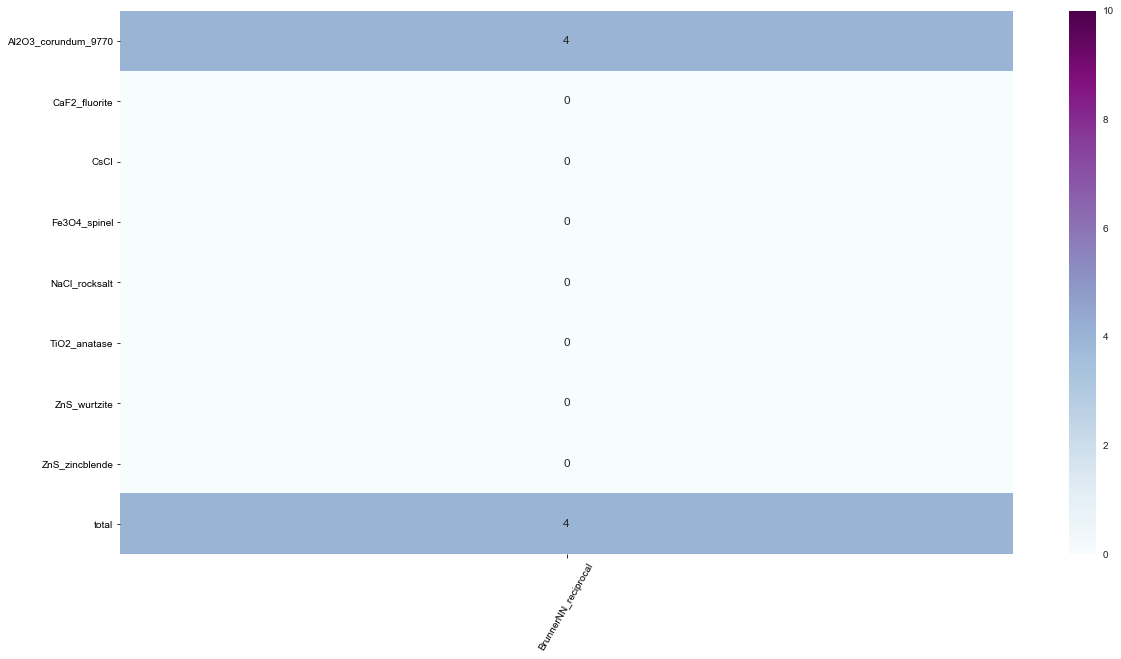

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

sns.set(font='Times New Roman')
sns.set(font_scale=1)

hm = sns.heatmap(final_uw, annot=True, cmap="BuPu", vmax=10)

ax.set_xticklabels(final_uw.columns.tolist(), rotation=60)
ax.set_yticklabels(final_uw.index.tolist())


plt.show()